In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset From Kaggle

In [ ]:
#Install Kaggle
!pip install kaggle

In [ ]:
#Upload you API token kaggle.json:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aunkonhabib","key":"2d3e7b51eb26e556a68b34641794c92b"}'}

In [ ]:
#Create a directory kaggle
!mkdir ~/.kaggle

In [ ]:
#Copy kaggle.json file
!cp kaggle.json ~/.kaggle/

In [ ]:
#Grant Permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset
! kaggle datasets download  masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# Load Train Data

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df


In [ ]:
tr_df = train_df('/content/Training')
tr_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_0643.jpg,meningioma
1,/content/Training/meningioma/Tr-me_1021.jpg,meningioma
2,/content/Training/meningioma/Tr-me_1208.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0868.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0315.jpg,meningioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_0169.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_1210.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0088.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_1266.jpg,pituitary


# Load Test Data

---



In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
ts_df = test_df('/content/Testing')
ts_df

,Class Path,Class
0,/content/Testing/meningioma/Te-me_0151.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0100.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0064.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0084.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0223.jpg,meningioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0152.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0252.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0228.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0104.jpg,pituitary


# Number of images in each class in train data

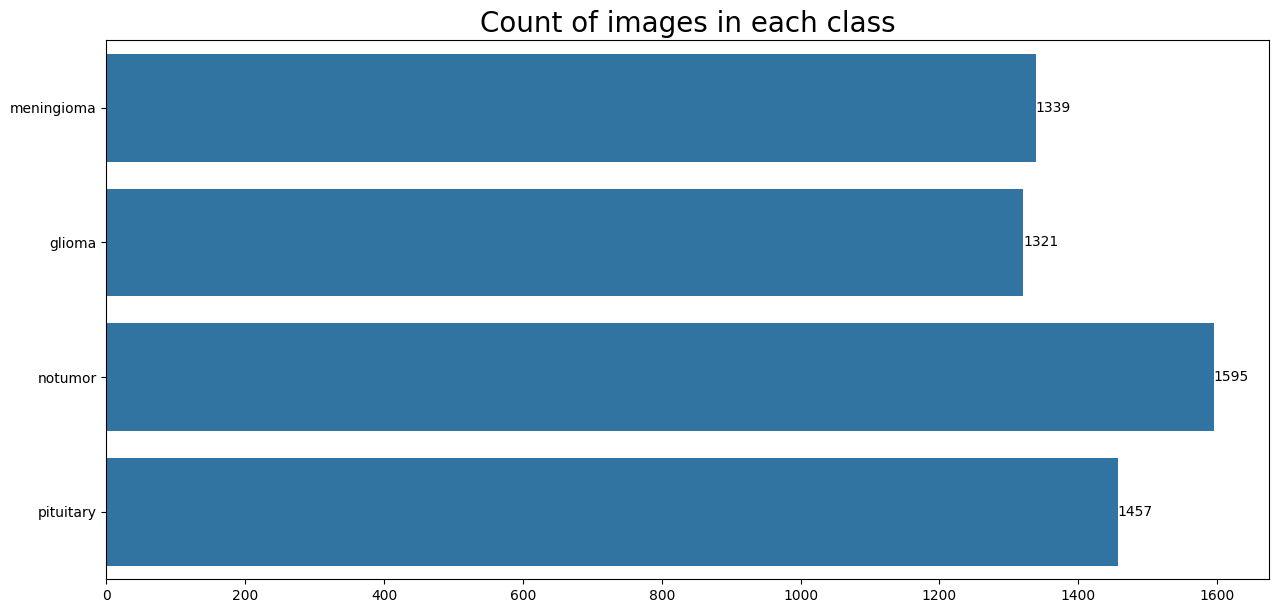

In [ ]:

plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# Count each class in test data

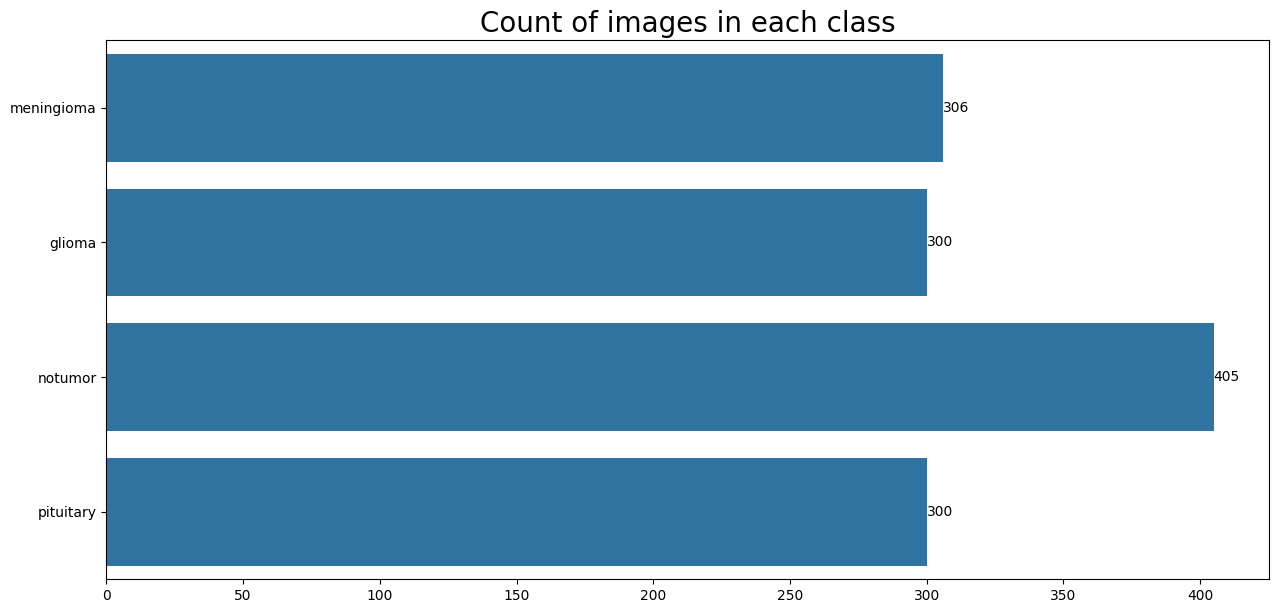

In [ ]:

plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

#  Split data into train, test, valid

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])
valid_df

,Class Path,Class
592,/content/Testing/glioma/Te-gl_0040.jpg,glioma
18,/content/Testing/meningioma/Te-me_0030.jpg,meningioma
1072,/content/Testing/pituitary/Te-pi_0251.jpg,pituitary
73,/content/Testing/meningioma/Te-me_0191.jpg,meningioma
415,/content/Testing/glioma/Te-gl_0194.jpg,glioma
...,...,...
365,/content/Testing/glioma/Te-gl_0076.jpg,glioma
860,/content/Testing/notumor/Te-no_0231.jpg,notumor
579,/content/Testing/glioma/Te-gl_0223.jpg,glioma
194,/content/Testing/meningioma/Te-me_0251.jpg,meningioma


# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input


batch_size = 32
img_size = (299, 299)
seed = 42

# Augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

# No augmentation for validation and test
test_val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train generator
tr_gen = train_datagen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    seed=seed
)

# Validation generator
valid_gen = test_val_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

# Test generator
ts_gen = test_val_datagen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    seed=seed
)

print("Class indices:", tr_gen.class_indices)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.
Class indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


# Getting samples from data

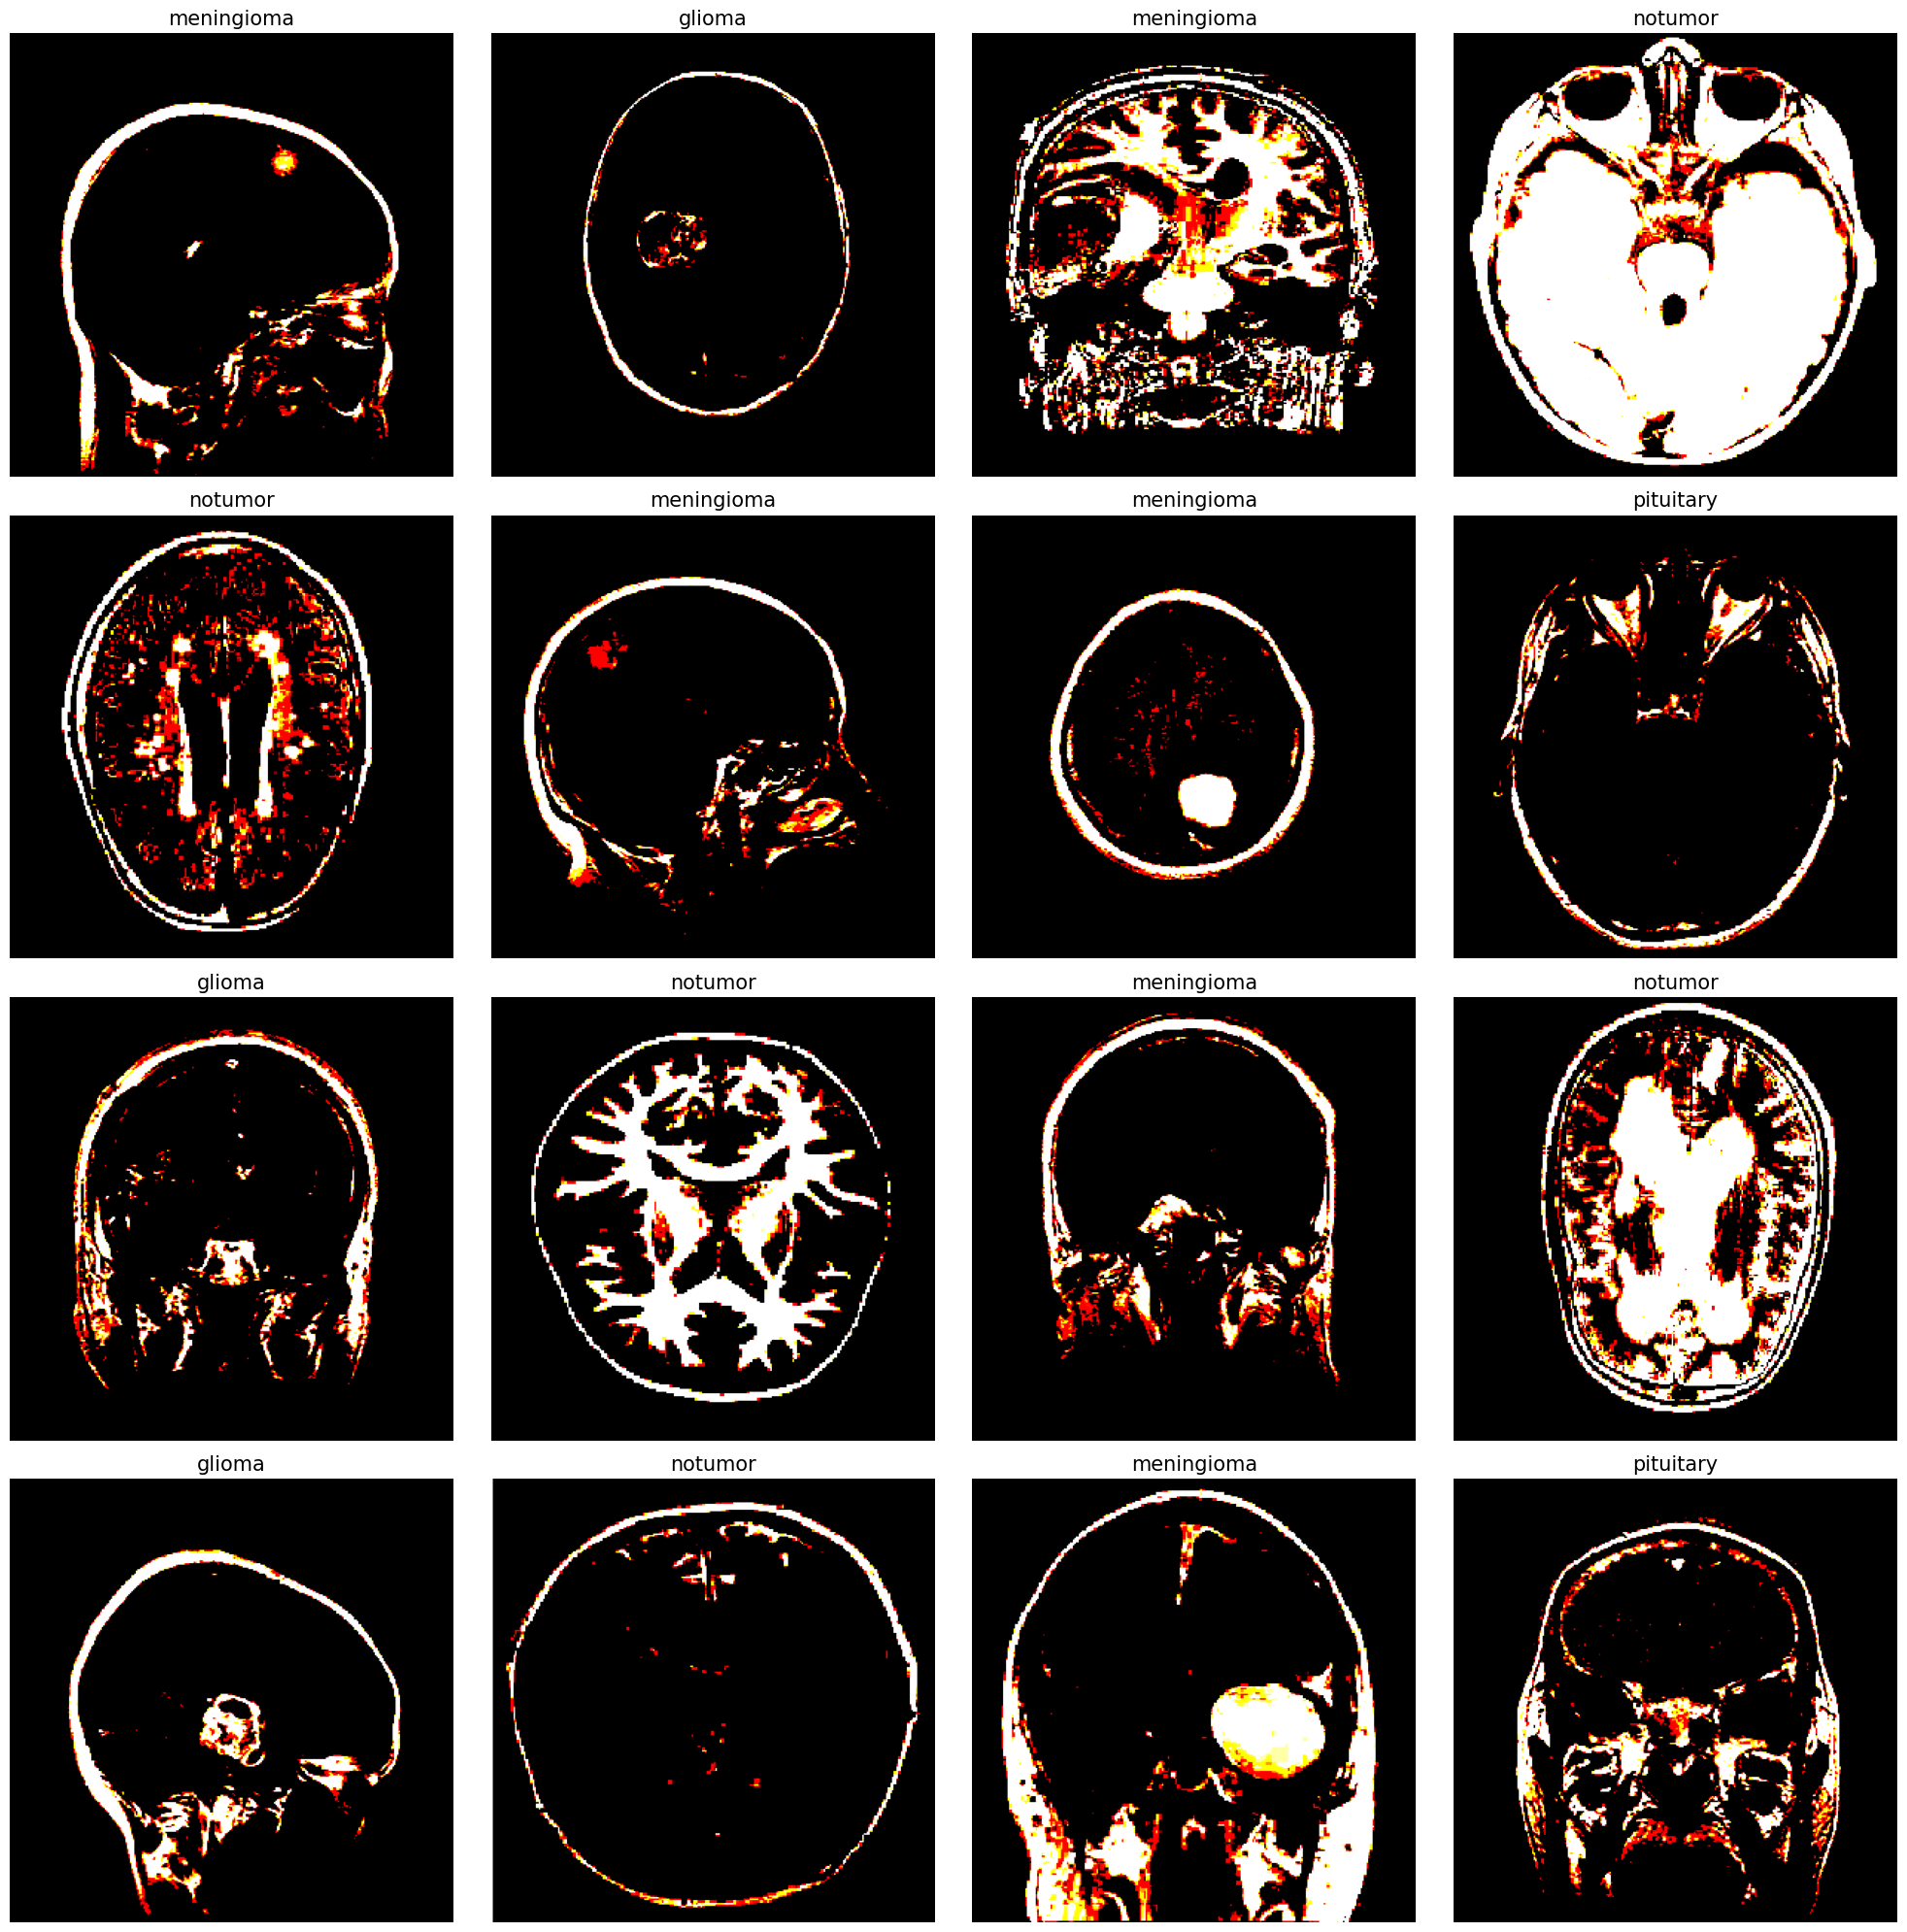

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20, 20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, i + 1)

    image_vis = (image + 1.0) / 2.0
    image_vis = np.clip(image_vis, 0, 1)

    plt.imshow(image_vis)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Building Deep Learning Model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import tensorflow as tf

# Image shape and number of classes
img_shape = (299, 299, 3)
num_classes = 4

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)

# Load VGG16 base model
base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape
)

# Freeze some early layers
base_model.trainable = True
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output

# Add a Conv Block
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# Global Pooling
gap = layers.GlobalAveragePooling2D()(x)

x = layers.Reshape((1, 1, -1))(gap)
x = layers.Conv2D(256, (1, 1), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)

# Dense Layers
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.3)(x)

# Output Layer
output = layers.Dense(num_classes, activation='softmax')(x)

# model building
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 299, 299, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 299, 299, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 149, 149, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 149, 149, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 149, 149, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 74, 74, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 74, 74, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 74, 74, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 37, 37, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 37, 37, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 9, 9, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 16,422,980 (62.65 MB)

 Trainable params: 14,686,212 (56.02 MB)

 Non-trainable params: 1,736,768 (6.63 MB)

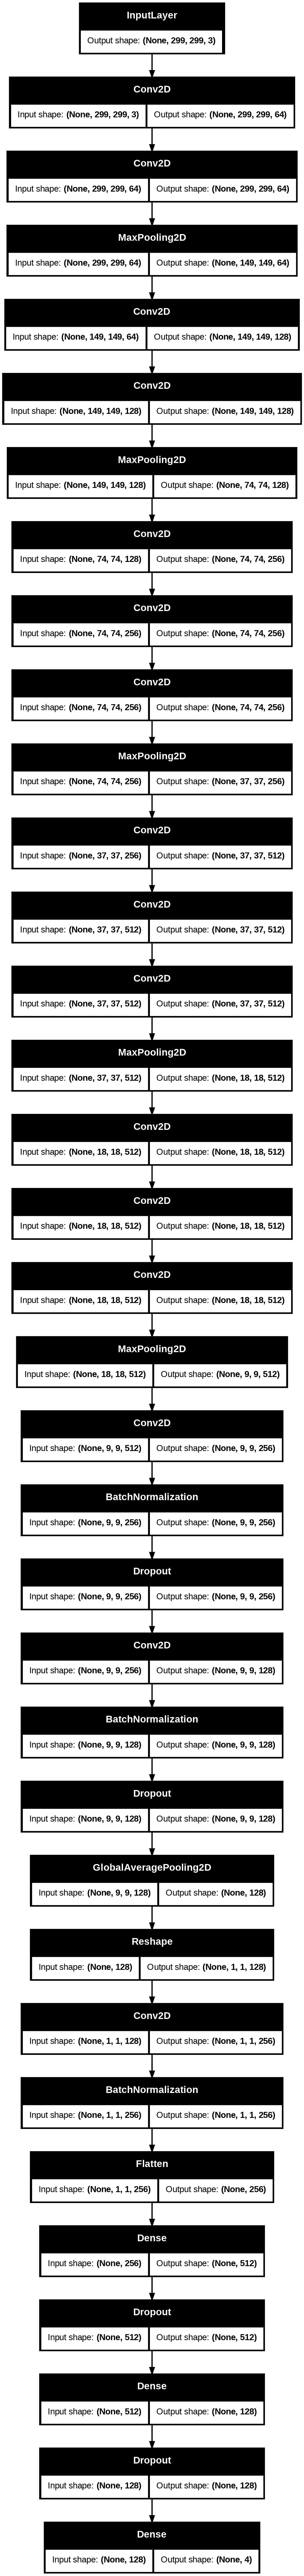

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=False)

# Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

hist = model.fit(tr_gen,
                 epochs=1000,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[early_stopping, checkpoint])


Epoch 1/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6184 - loss: 6.2459 - precision: 0.7236 - recall: 0.5154   

179/179 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.6192 - loss: 6.2435 - precision: 0.7243 - recall: 0.5164 - val_accuracy: 0.7893 - val_loss: 5.5626 - val_precision: 0.8673 - val_recall: 0.7282
Epoch 2/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.8972 - loss: 5.0320 - precision: 0.9174 - recall: 0.8770

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 982ms/step - accuracy: 0.8973 - loss: 5.0309 - precision: 0.9174 - recall: 0.8770 - val_accuracy: 0.8641 - val_loss: 4.6478 - val_precision: 0.8768 - val_recall: 0.8580
Epoch 3/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.9362 - loss: 4.2554 - precision: 0.9458 - recall: 0.9267

179/179 ━━━━━━━━━━━━━━━━━━━━ 178s 993ms/step - accuracy: 0.9362 - loss: 4.2546 - precision: 0.9457 - recall: 0.9267 - val_accuracy: 0.9008 - val_loss: 3.8635 - val_precision: 0.9084 - val_recall: 0.8931
Epoch 4/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 943ms/step - accuracy: 0.9474 - loss: 3.5939 - precision: 0.9523 - recall: 0.9389

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 985ms/step - accuracy: 0.9475 - loss: 3.5931 - precision: 0.9523 - recall: 0.9390 - val_accuracy: 0.9069 - val_loss: 3.2485 - val_precision: 0.9110 - val_recall: 0.9069
Epoch 5/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 947ms/step - accuracy: 0.9530 - loss: 3.0100 - precision: 0.9621 - recall: 0.9455

179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 988ms/step - accuracy: 0.9530 - loss: 3.0092 - precision: 0.9621 - recall: 0.9456 - val_accuracy: 0.9603 - val_loss: 2.6216 - val_precision: 0.9618 - val_recall: 0.9603
Epoch 6/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.9594 - loss: 2.5003 - precision: 0.9632 - recall: 0.9563

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 982ms/step - accuracy: 0.9594 - loss: 2.4997 - precision: 0.9632 - recall: 0.9563 - val_accuracy: 0.9847 - val_loss: 2.1059 - val_precision: 0.9847 - val_recall: 0.9832
Epoch 7/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.9779 - loss: 2.0274 - precision: 0.9809 - recall: 0.9748

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 980ms/step - accuracy: 0.9779 - loss: 2.0269 - precision: 0.9809 - recall: 0.9747 - val_accuracy: 0.9802 - val_loss: 1.7474 - val_precision: 0.9817 - val_recall: 0.9802
Epoch 8/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.9809 - loss: 1.6653 - precision: 0.9837 - recall: 0.9783

179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 979ms/step - accuracy: 0.9809 - loss: 1.6649 - precision: 0.9837 - recall: 0.9783 - val_accuracy: 0.9756 - val_loss: 1.4467 - val_precision: 0.9755 - val_recall: 0.9725
Epoch 9/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 174s 973ms/step - accuracy: 0.9833 - loss: 1.3422 - precision: 0.9850 - recall: 0.9819 - val_accuracy: 0.8763 - val_loss: 1.5406 - val_precision: 0.8790 - val_recall: 0.8763
Epoch 10/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 942ms/step - accuracy: 0.9790 - loss: 1.1076 - precision: 0.9806 - recall: 0.9771

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 983ms/step - accuracy: 0.9790 - loss: 1.1073 - precision: 0.9806 - recall: 0.9771 - val_accuracy: 0.9221 - val_loss: 1.1449 - val_precision: 0.9276 - val_recall: 0.9191
Epoch 11/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 935ms/step - accuracy: 0.9852 - loss: 0.8829 - precision: 0.9866 - recall: 0.9831

179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 976ms/step - accuracy: 0.9851 - loss: 0.8827 - precision: 0.9866 - recall: 0.9831 - val_accuracy: 0.9725 - val_loss: 0.8008 - val_precision: 0.9755 - val_recall: 0.9710
Epoch 12/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.9832 - loss: 0.7221 - precision: 0.9866 - recall: 0.9812

179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 977ms/step - accuracy: 0.9832 - loss: 0.7219 - precision: 0.9866 - recall: 0.9812 - val_accuracy: 0.9710 - val_loss: 0.6839 - val_precision: 0.9725 - val_recall: 0.9710
Epoch 13/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.9860 - loss: 0.5800 - precision: 0.9862 - recall: 0.9849

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 978ms/step - accuracy: 0.9860 - loss: 0.5799 - precision: 0.9862 - recall: 0.9849 - val_accuracy: 0.9359 - val_loss: 0.6107 - val_precision: 0.9371 - val_recall: 0.9328
Epoch 14/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.9931 - loss: 0.4572 - precision: 0.9941 - recall: 0.9916

179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 975ms/step - accuracy: 0.9931 - loss: 0.4570 - precision: 0.9941 - recall: 0.9916 - val_accuracy: 0.9939 - val_loss: 0.3861 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 15/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.9957 - loss: 0.3621 - precision: 0.9958 - recall: 0.9953

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 980ms/step - accuracy: 0.9957 - loss: 0.3621 - precision: 0.9958 - recall: 0.9952 - val_accuracy: 0.9847 - val_loss: 0.3458 - val_precision: 0.9861 - val_recall: 0.9771
Epoch 16/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.9870 - loss: 0.3183 - precision: 0.9880 - recall: 0.9858

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 978ms/step - accuracy: 0.9870 - loss: 0.3182 - precision: 0.9880 - recall: 0.9858 - val_accuracy: 0.9847 - val_loss: 0.2713 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 17/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - accuracy: 0.9883 - loss: 0.2582 - precision: 0.9888 - recall: 0.9879

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 980ms/step - accuracy: 0.9883 - loss: 0.2581 - precision: 0.9888 - recall: 0.9879 - val_accuracy: 0.9908 - val_loss: 0.2299 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 18/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.9897 - loss: 0.2158 - precision: 0.9905 - recall: 0.9897

179/179 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9897 - loss: 0.2157 - precision: 0.9905 - recall: 0.9897 - val_accuracy: 0.9802 - val_loss: 0.2020 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 19/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - accuracy: 0.9922 - loss: 0.1770 - precision: 0.9922 - recall: 0.9912

179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 988ms/step - accuracy: 0.9922 - loss: 0.1770 - precision: 0.9922 - recall: 0.9912 - val_accuracy: 0.9863 - val_loss: 0.1641 - val_precision: 0.9878 - val_recall: 0.9863
Epoch 20/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 947ms/step - accuracy: 0.9946 - loss: 0.1429 - precision: 0.9955 - recall: 0.9935

179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 987ms/step - accuracy: 0.9946 - loss: 0.1429 - precision: 0.9955 - recall: 0.9935 - val_accuracy: 0.9878 - val_loss: 0.1481 - val_precision: 0.9893 - val_recall: 0.9878
Epoch 21/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.9935 - loss: 0.1282 - precision: 0.9941 - recall: 0.9930

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 983ms/step - accuracy: 0.9935 - loss: 0.1282 - precision: 0.9941 - recall: 0.9930 - val_accuracy: 0.9924 - val_loss: 0.1166 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 22/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9900 - loss: 0.1211 - precision: 0.9909 - recall: 0.9898 - val_accuracy: 0.9802 - val_loss: 0.1635 - val_precision: 0.9817 - val_recall: 0.9802
Epoch 23/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.9912 - loss: 0.1064 - precision: 0.9918 - recall: 0.9905

179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 981ms/step - accuracy: 0.9912 - loss: 0.1064 - precision: 0.9918 - recall: 0.9905 - val_accuracy: 0.9924 - val_loss: 0.0897 - val_precision: 0.9939 - val_recall: 0.9924
Epoch 24/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 178s 992ms/step - accuracy: 0.9954 - loss: 0.0919 - precision: 0.9954 - recall: 0.9948 - val_accuracy: 0.9863 - val_loss: 0.1148 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 25/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.9966 - loss: 0.0751 - precision: 0.9966 - recall: 0.9961

179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 987ms/step - accuracy: 0.9966 - loss: 0.0751 - precision: 0.9966 - recall: 0.9961 - val_accuracy: 0.9969 - val_loss: 0.0622 - val_precision: 0.9969 - val_recall: 0.9969
Epoch 26/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 988ms/step - accuracy: 0.9977 - loss: 0.0683 - precision: 0.9983 - recall: 0.9977 - val_accuracy: 0.9710 - val_loss: 0.1661 - val_precision: 0.9709 - val_recall: 0.9664
Epoch 27/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 973ms/step - accuracy: 0.9969 - loss: 0.0642 - precision: 0.9970 - recall: 0.9957 - val_accuracy: 0.9924 - val_loss: 0.0731 - val_precision: 0.9923 - val_recall: 0.9893
Epoch 28/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 977ms/step - accuracy: 0.9909 - loss: 0.0766 - precision: 0.9924 - recall: 0.9908 - val_accuracy: 0.9924 - val_loss: 0.0688 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 29/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 982ms/step - accuracy: 0.9950 - loss: 0.0627 - precision: 0.9954 - recall: 0.9948 - val_accuracy: 

179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 977ms/step - accuracy: 0.9991 - loss: 0.0459 - precision: 0.9991 - recall: 0.9991 - val_accuracy: 0.9954 - val_loss: 0.0490 - val_precision: 0.9969 - val_recall: 0.9954
Epoch 32/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 978ms/step - accuracy: 0.9973 - loss: 0.0442 - precision: 0.9983 - recall: 0.9968 - val_accuracy: 0.9679 - val_loss: 0.1479 - val_precision: 0.9709 - val_recall: 0.9679
Epoch 33/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 975ms/step - accuracy: 0.9924 - loss: 0.0573 - precision: 0.9939 - recall: 0.9919 - val_accuracy: 0.9802 - val_loss: 0.0969 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 34/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 178s 992ms/step - accuracy: 0.9956 - loss: 0.0503 - precision: 0.9957 - recall: 0.9954 - val_accuracy: 0.9908 - val_loss: 0.0730 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 35/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 174s 969ms/step - accuracy: 0.9917 - loss: 0.0607 - precision: 0.9926 - recall: 0.9916 - val_accuracy: 

179/179 ━━━━━━━━━━━━━━━━━━━━ 175s 975ms/step - accuracy: 0.9973 - loss: 0.0429 - precision: 0.9979 - recall: 0.9973 - val_accuracy: 0.9969 - val_loss: 0.0441 - val_precision: 0.9969 - val_recall: 0.9969
Epoch 37/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 983ms/step - accuracy: 0.9980 - loss: 0.0393 - precision: 0.9980 - recall: 0.9978 - val_accuracy: 0.9924 - val_loss: 0.0511 - val_precision: 0.9924 - val_recall: 0.9908
Epoch 38/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 178s 995ms/step - accuracy: 0.9990 - loss: 0.0353 - precision: 0.9990 - recall: 0.9990 - val_accuracy: 0.9969 - val_loss: 0.0476 - val_precision: 0.9969 - val_recall: 0.9969
Epoch 39/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9972 - loss: 0.0422 - precision: 0.9979 - recall: 0.9972 - val_accuracy: 0.9924 - val_loss: 0.0504 - val_precision: 0.9939 - val_recall: 0.9924
Epoch 40/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9972 - loss: 0.0405 - precision: 0.9974 - recall: 0.9972 - val_accuracy: 0.9924

179/179 ━━━━━━━━━━━━━━━━━━━━ 179s 1000ms/step - accuracy: 0.9954 - loss: 0.0401 - precision: 0.9960 - recall: 0.9954 - val_accuracy: 0.9954 - val_loss: 0.0431 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 45/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 990ms/step - accuracy: 0.9967 - loss: 0.0385 - precision: 0.9971 - recall: 0.9966 - val_accuracy: 0.9908 - val_loss: 0.0640 - val_precision: 0.9924 - val_recall: 0.9908
Epoch 46/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 985ms/step - accuracy: 0.9978 - loss: 0.0394 - precision: 0.9984 - recall: 0.9968 - val_accuracy: 0.9954 - val_loss: 0.0462 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 47/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9986 - loss: 0.0336 - precision: 0.9986 - recall: 0.9985 - val_accuracy: 0.9924 - val_loss: 0.0596 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 48/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 990ms/step - accuracy: 0.9982 - loss: 0.0338 - precision: 0.9982 - recall: 0.9982 - val_accuracy: 0.

179/179 ━━━━━━━━━━━━━━━━━━━━ 179s 997ms/step - accuracy: 0.9971 - loss: 0.0407 - precision: 0.9971 - recall: 0.9967 - val_accuracy: 0.9924 - val_loss: 0.0327 - val_precision: 0.9939 - val_recall: 0.9924
Epoch 51/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 982ms/step - accuracy: 0.9997 - loss: 0.0294 - precision: 0.9997 - recall: 0.9997 - val_accuracy: 0.9969 - val_loss: 0.0346 - val_precision: 0.9969 - val_recall: 0.9969
Epoch 52/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 986ms/step - accuracy: 0.9996 - loss: 0.0289 - precision: 0.9996 - recall: 0.9995 - val_accuracy: 0.9939 - val_loss: 0.0456 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 53/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 979ms/step - accuracy: 0.9989 - loss: 0.0284 - precision: 0.9989 - recall: 0.9989 - val_accuracy: 0.9924 - val_loss: 0.0347 - val_precision: 0.9924 - val_recall: 0.9924
Epoch 54/1000
179/179 ━━━━━━━━━━━━━━━━━━━━ 177s 986ms/step - accuracy: 0.9987 - loss: 0.0313 - precision: 0.9987 - recall: 0.9987 - val_accuracy: 

# Visualize model performance

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

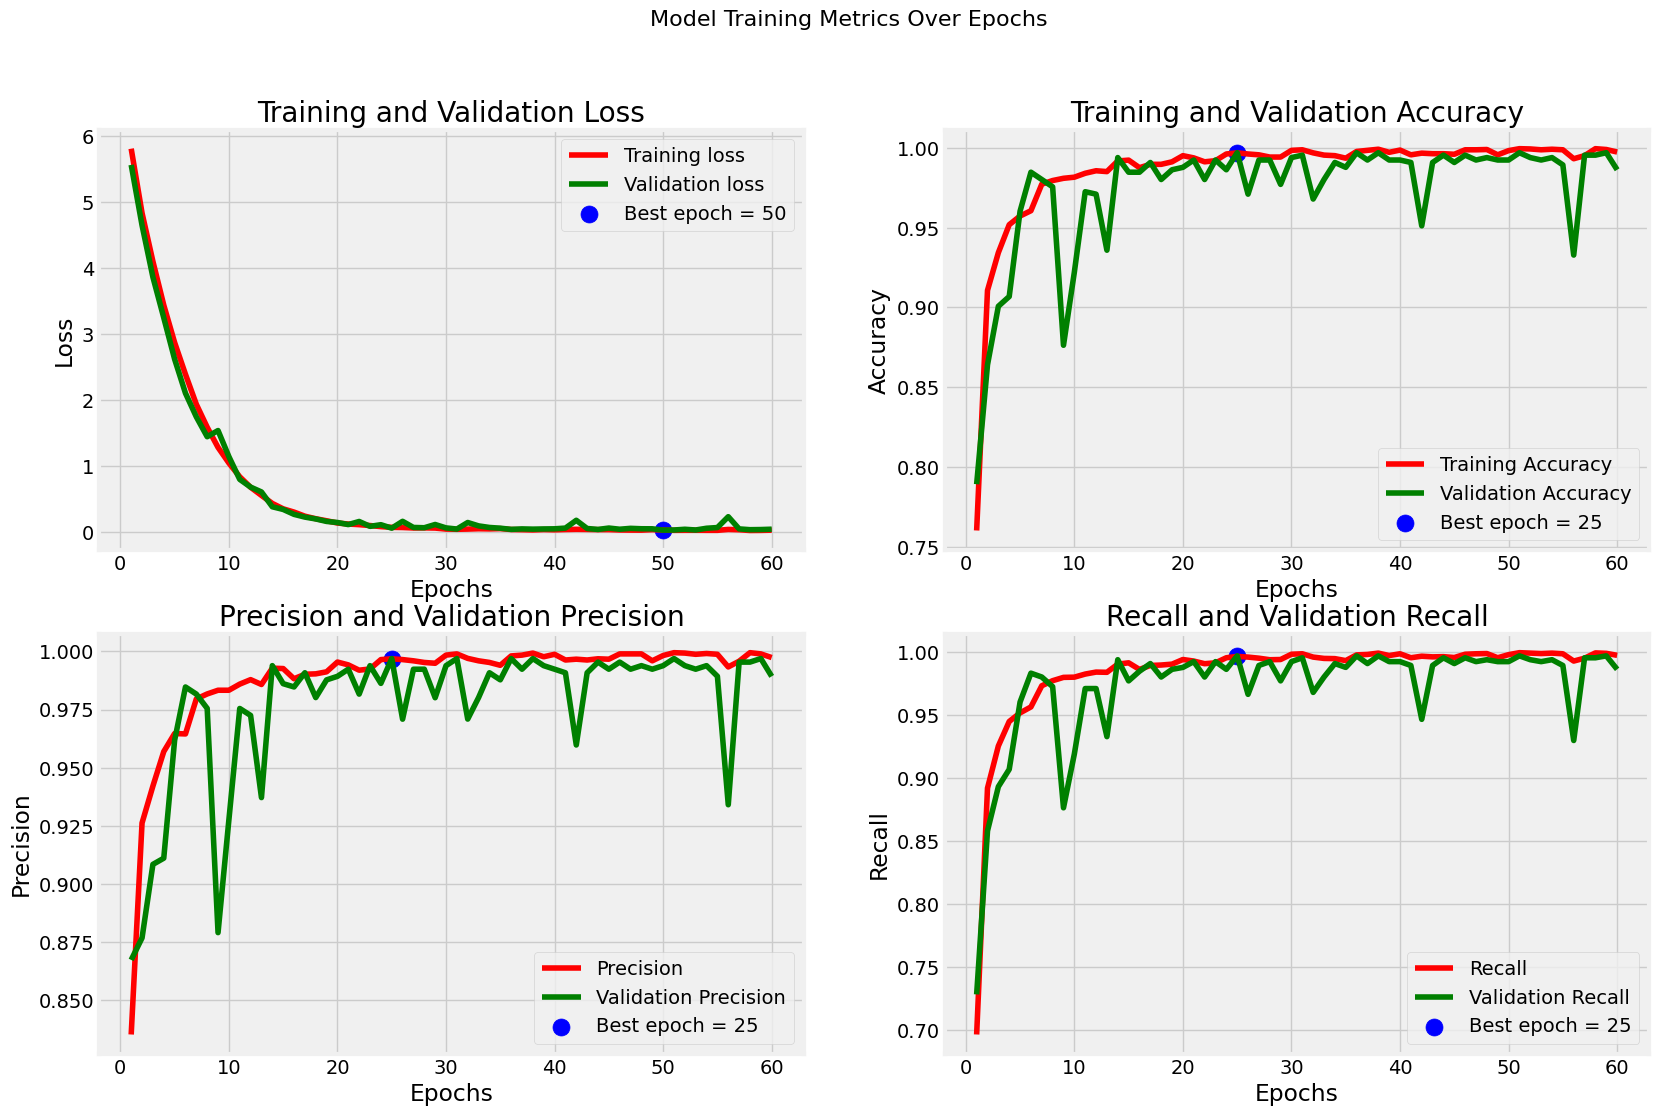

In [ ]:
tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
tr_per = hist.history['precision']
tr_recall = hist.history['recall']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
val_per = hist.history['val_precision']
val_recall = hist.history['val_recall']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
index_precision = np.argmax(val_per)
per_highest = val_per[index_precision]
index_recall = np.argmax(val_recall)
recall_highest = val_recall[index_recall]

Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'
per_label = f'Best epoch = {str(index_precision + 1)}'
recall_label = f'Best epoch = {str(index_recall + 1)}'


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')


plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Epochs, tr_per, 'r', label='Precision')
plt.plot(Epochs, val_per, 'g', label='Validation Precision')
plt.scatter(index_precision + 1, per_highest, s=150, c='blue', label=per_label)
plt.title('Precision and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Epochs, tr_recall, 'r', label='Recall')
plt.plot(Epochs, val_recall, 'g', label='Validation Recall')
plt.scatter(index_recall + 1, recall_highest, s=150, c='blue', label=recall_label)
plt.title('Recall and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


# Model Evaluation

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

# the test_score[0] = loss, test_score[1] = accuracy, test_score[2] = precision, test_score[3] = recall
print(test_score)

179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 926ms/step - accuracy: 0.9993 - loss: 0.0267 - precision: 0.9993 - recall: 0.9993
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.9937 - loss: 0.0311 - precision: 0.9950 - recall: 0.9937
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.9998 - loss: 0.0260 - precision: 0.9998 - recall: 0.9998
Train Loss: 0.0257
Train Accuracy: 99.95%
--------------------
Validation Loss: 0.0327
Validation Accuracy: 99.24%
--------------------
Test Loss: 0.0368
Test Accuracy: 99.85%
[0.036825645714998245, 0.9984756112098694, 0.9984756112098694, 0.9984756112098694]


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step


# Plotting Confusuion Matrix

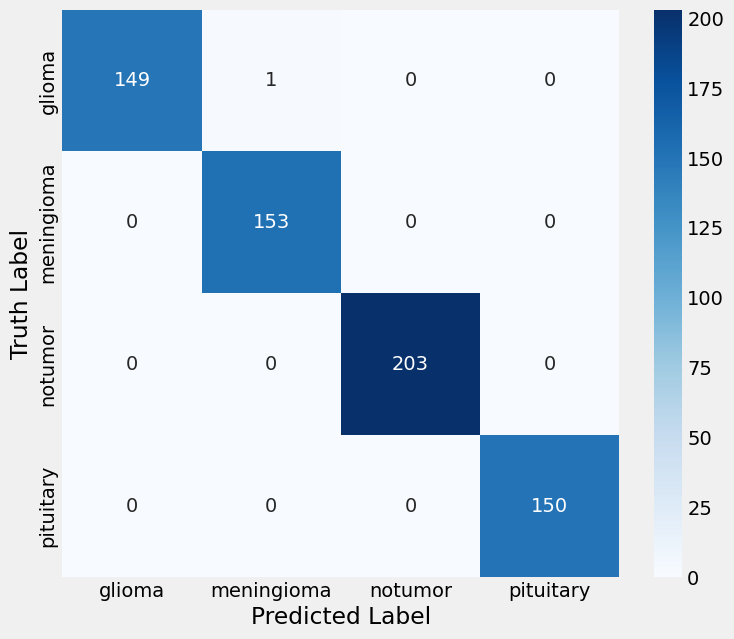

In [ ]:
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

# Classification Report

In [ ]:
report = classification_report(ts_gen.classes, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.99      1.00      1.00       153
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       150

    accuracy                           1.00       656
   macro avg       1.00      1.00      1.00       656
weighted avg       1.00      1.00      1.00       656



# Testing

In [ ]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    from tensorflow.keras.applications.vgg16 import preprocess_input

    # Generator label order
    labels = list(tr_gen.class_indices.keys())

    plt.figure(figsize=(12, 12))
    img = Image.open(img_path).convert('RGB')
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)

    img = preprocess_input(img)

    predictions = model.predict(img)
    probs = list(predictions[0])

    # Plotting
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.axis('off')
    plt.title("Input Image")

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs, color='skyblue')
    plt.xlabel('Probability', fontsize=15)
    plt.title("Class Probabilities")
    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


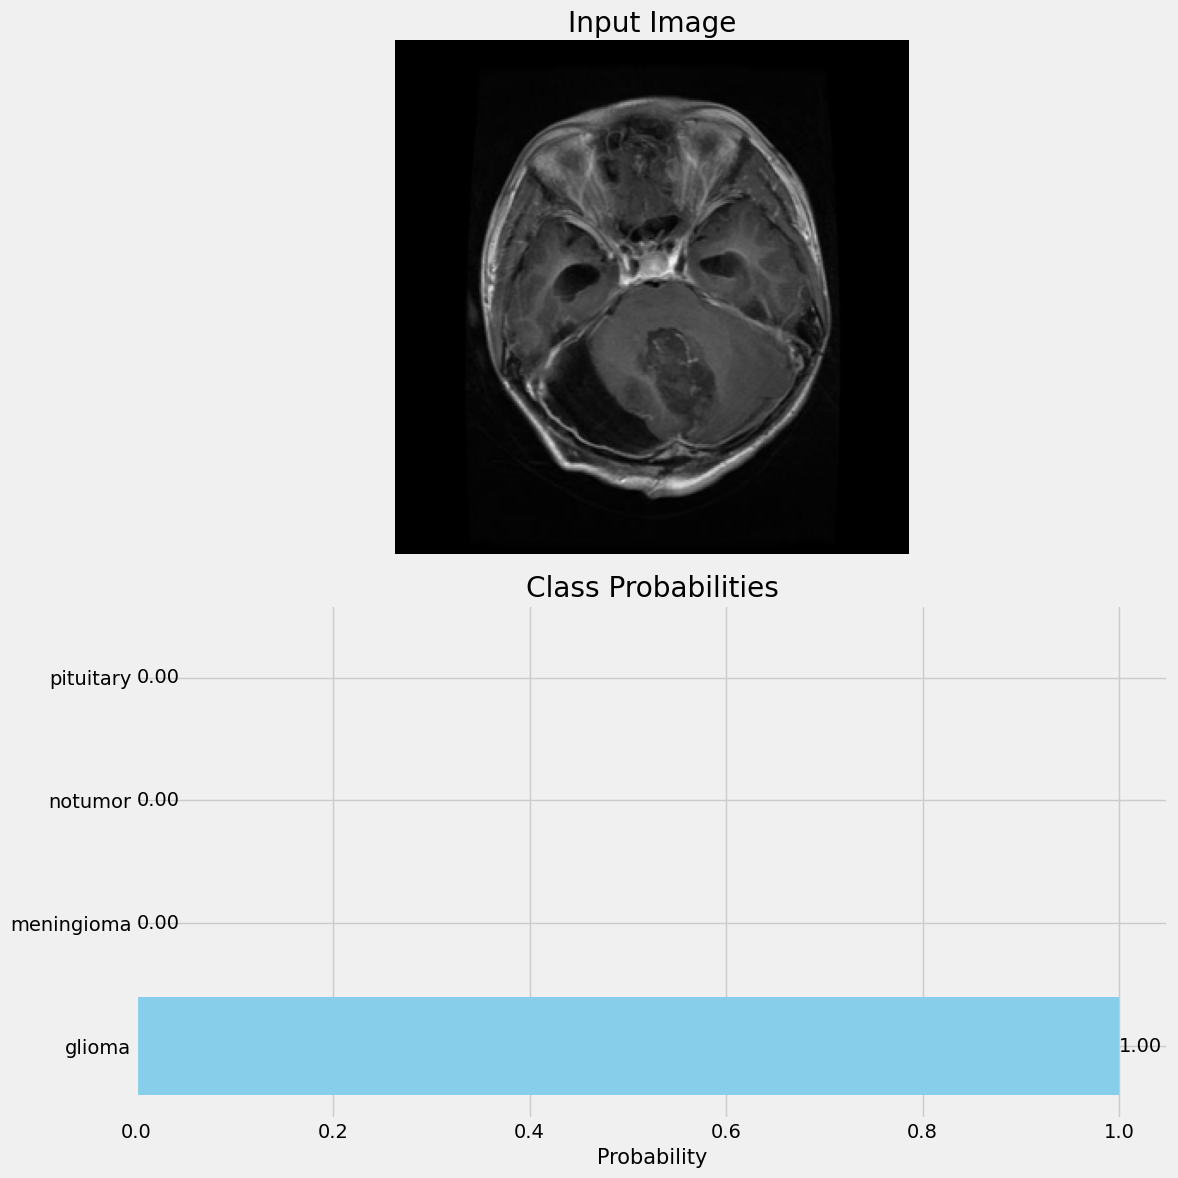

In [ ]:
predict('/content/Testing/glioma/Te-glTr_0000.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


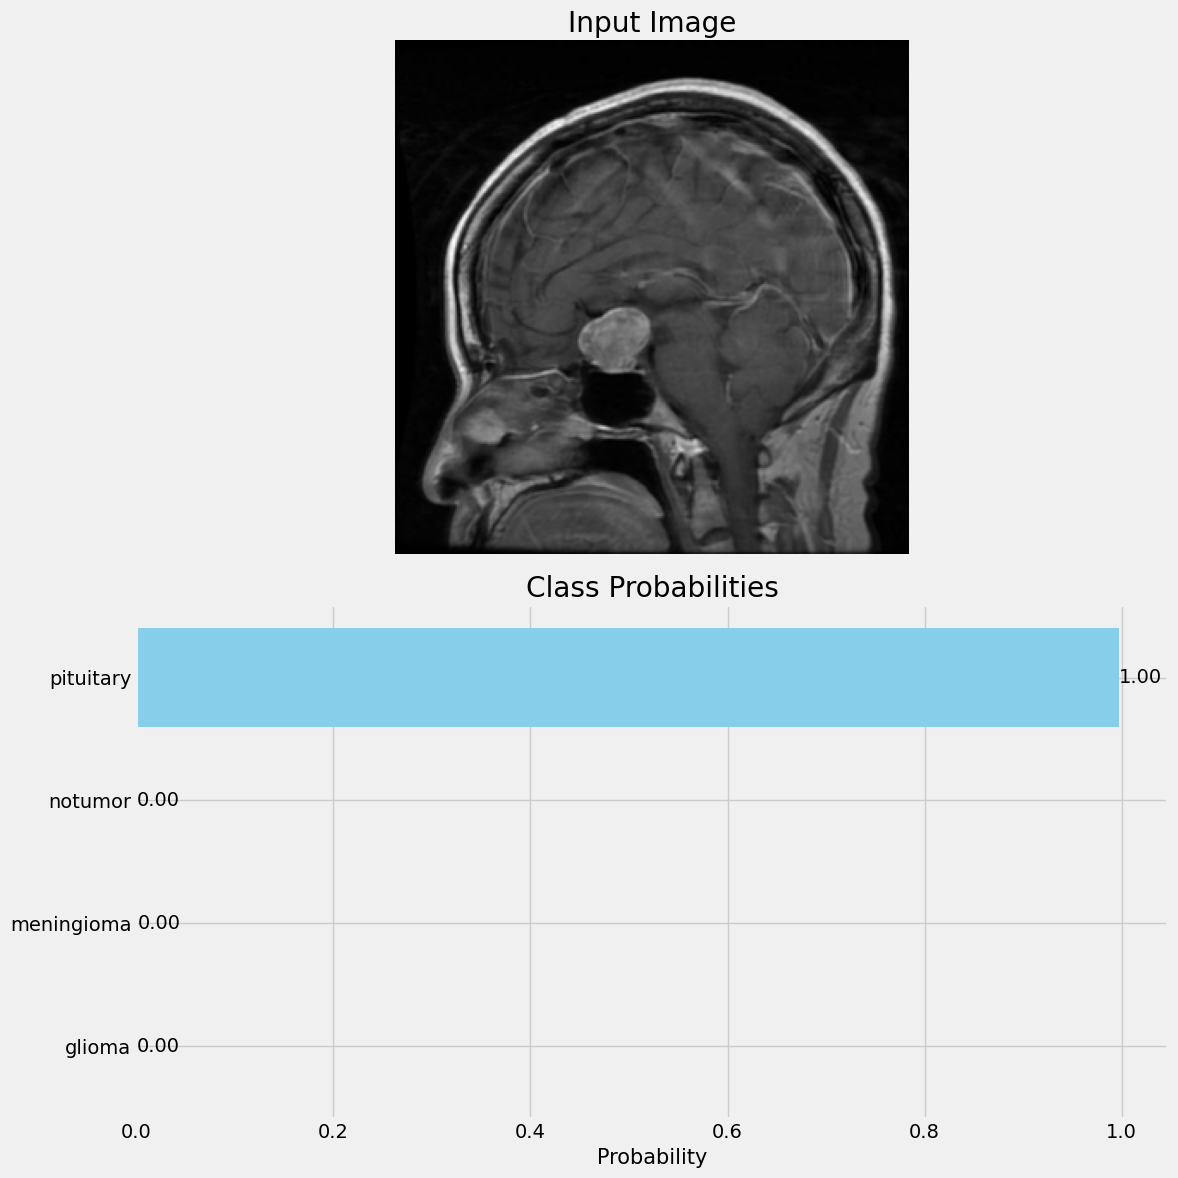

In [ ]:
predict('/content/Testing/pituitary/Te-piTr_0008.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


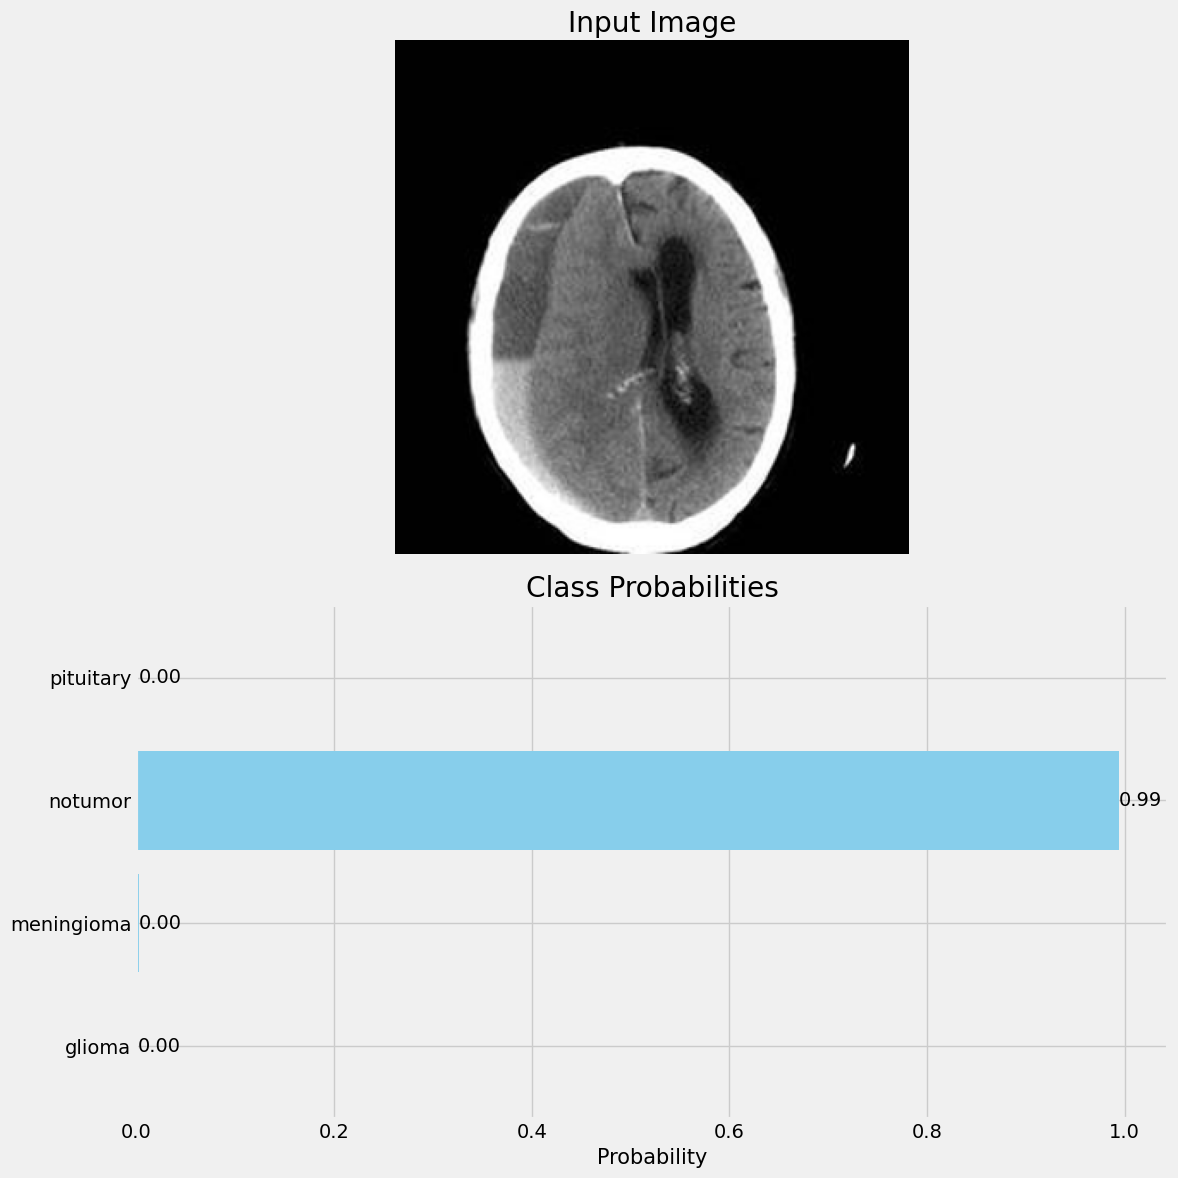

In [ ]:
predict('/content/Testing/notumor/Te-noTr_0000.jpg')